#Model Building

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import pickle

In [ ]:
data = pd.read_csv('/content/sentiment_analysis.csv')

In [ ]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


##Data Preprocessing

In [ ]:
data.shape

(7920, 3)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

##Text Preprocessing

In [ ]:
import re
import string

In [ ]:
data["tweet"].head(5)

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

In [ ]:
data["tweet"] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [ ]:
data["tweet"].head(5)

0    #fingerprint #Pregnancy Test  #android #apps #...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)

In [ ]:
data["tweet"].head(5)

0    fingerprint Pregnancy Test  android apps beaut...
1    Finally a transparant silicon case  Thanks to ...
2    We love this Would you go talk makememories un...
3    Im wired I know Im George I was made that way ...
4    What amazing service Apple wont even talk to m...
Name: tweet, dtype: object

In [ ]:
data["tweet"] = data['tweet'].str.replace('\d+', '',regex=True)

In [ ]:
data["tweet"].tail(10)

7910    Perfect match instagood applewatch red instagr...
7911    I am completely in love with the new iPhone em...
7912    Tune in Turn on Drop out  GTD in one app  mobi...
7913    Ok so my galaxy crashed after one day now I ha...
7914    Gain Followers RT This MUST FOLLOW ME I FOLLOW...
7915    Live out loud lol liveoutloud selfie smile son...
7916    We would like to wish you an amazing day Make ...
7917    Helping my lovely  year old neighbor with her ...
7918    Finally got my smart pocket wifi stay connecte...
7919    Apple Barcelona Apple Store BCN Barcelona trav...
Name: tweet, dtype: object

In [ ]:
import nltk

In [ ]:
nltk.download('stopwords',download_dir='/content/static')

[nltk_data] Downloading package stopwords to /content/static...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
with open('../content/static/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [ ]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [ ]:
data["tweet"].head(5)

0    fingerprint Pregnancy Test android apps beauti...
1    Finally transparant silicon case Thanks uncle ...
2    We love Would go talk makememories unplug rela...
3    Im wired I know Im George I made way iphone cu...
4    What amazing service Apple wont even talk ques...
Name: tweet, dtype: object

In [ ]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [ ]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [ ]:
data["tweet"].head(5)

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    we love would go talk makememori unplug relax ...
3    im wire i know im georg i made way iphon cute ...
4    what amaz servic appl wont even talk question ...
Name: tweet, dtype: object

In [ ]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,we love would go talk makememori unplug relax ...
3,4,0,im wire i know im georg i made way iphon cute ...
4,5,1,what amaz servic appl wont even talk question ...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,we would like wish amaz day make everi minut c...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


##Building Vocabulary

In [ ]:
from collections import Counter
vocab = Counter()

In [ ]:
vocab

Counter()

In [ ]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [ ]:
vocab

Counter({'fingerprint': 5,
         'pregnanc': 1,
         'test': 12,
         'android': 414,
         'app': 416,
         'beauti': 322,
         'cute': 322,
         'health': 120,
         'iger': 143,
         'iphoneonli': 129,
         'iphonesia': 137,
         'iphon': 4073,
         'final': 192,
         'transpar': 5,
         'silicon': 5,
         'case': 348,
         'thank': 263,
         'uncl': 4,
         'yay': 69,
         'soni': 819,
         'xperia': 60,
         's': 142,
         'sonyexperias…': 1,
         'we': 115,
         'love': 499,
         'would': 146,
         'go': 209,
         'talk': 27,
         'makememori': 1,
         'unplug': 3,
         'relax': 41,
         'smartphon': 134,
         'wifi': 50,
         'connect': 27,
         'im': 294,
         'wire': 8,
         'i': 1771,
         'know': 106,
         'georg': 1,
         'made': 72,
         'way': 53,
         'daventri': 1,
         'home': 143,
         'what': 78,
    

In [ ]:
len(vocab)

16029

In [ ]:
data.shape

(7920, 3)

In [ ]:
tokens = [key for key in vocab if vocab[key] > 10]

In [ ]:
tokens

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 's',
 'we',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'i',
 'know',
 'made',
 'way',
 'home',
 'what',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'ha',
 'not',
 'need',
 'realli',
 'drop',
 'ball',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',

In [ ]:
len(tokens)

1207

In [ ]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding = "utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens,'../content/static/corpora/vocabulary.txt')

In [ ]:
X = data['tweet']
y = data['label']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.shape

(6336,)

In [ ]:
X_test.shape

(1584,)

In [ ]:
y_train

7100    0
964     1
3400    0
7601    0
4052    0
       ..
4368    0
962     1
4680    0
6915    0
2771    0
Name: label, Length: 6336, dtype: int64

In [ ]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []

    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1

        vectorized_lst.append(sentence_lst)

    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)

    return vectorized_lst_new

In [ ]:
vectorized_X_train = vectorizer(X_train, tokens)

In [ ]:
vectorized_X_test = vectorizer(X_test, tokens)

In [ ]:
vectorized_X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_train

7100    0
964     1
3400    0
7601    0
4052    0
       ..
4368    0
962     1
4680    0
6915    0
2771    0
Name: label, Length: 6336, dtype: int64

In [ ]:
vectorized_X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test

2259    0
2759    0
545     0
4954    0
3794    1
       ..
7690    0
1022    0
6780    0
1525    0
4144    0
Name: label, Length: 1584, dtype: int64

In [ ]:
y_train.value_counts()

0    4727
1    1609
Name: label, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_X_train_smote, y_train_smote = smote.fit_resample(vectorized_X_train, y_train)
print(vectorized_X_train_smote.shape, y_train_smote.shape)

(9454, 1207) (9454,)


In [ ]:
y_train_smote.value_counts()

0    4727
1    4727
Name: label, dtype: int64

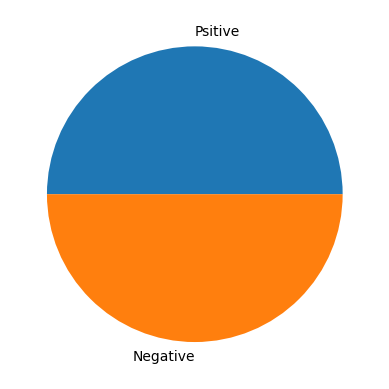

In [ ]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Psitive', 'Negative'])
plt.show()

In [ ]:
vectorized_X_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_train_smote

0       0
1       1
2       0
3       0
4       0
       ..
9449    1
9450    1
9451    1
9452    1
9453    1
Name: label, Length: 9454, dtype: int64

In [ ]:
vectorized_X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test

2259    0
2759    0
545     0
4954    0
3794    1
       ..
7690    0
1022    0
6780    0
1525    0
4144    0
Name: label, Length: 1584, dtype: int64

##Model Training and Evaluation

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

In [ ]:
lr = LogisticRegression()
lr.fit(vectorized_X_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_X_train_smote)

y_test_pred = lr.predict(vectorized_X_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.944
	Precision = 0.923
	Recall = 0.969
	F1-Score = 0.945
Testing Scores:
	Accuracy = 0.869
	Precision = 0.716
	Recall = 0.835
	F1-Score = 0.771


In [ ]:
import pickle
with open('../content/static/model.pickle', 'wb') as file:
    pickle.dump(lr, file)

#Get Predictions

In [ ]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [ ]:
with open('../content/static/model.pickle', 'rb') as f:
    model = pickle.load(f)

In [ ]:
with open('../content/static/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [ ]:
vocab = pd.read_csv('../content/static/corpora/vocabulary.txt', header = None)
tokens = vocab[0].tolist()

In [ ]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [ ]:
def preprocessing(text):
    data = pd.DataFrame([text], columns = ['tweet'])
    data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))
    data["tweet"] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))
    data["tweet"] = data["tweet"].apply(remove_punctuations)
    data["tweet"] = data['tweet'].str.replace('\d+', '',regex=True)
    data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))
    data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))
    return data['tweet']

In [ ]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []

    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1

        vectorized_lst.append(sentence_lst)

    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)

    return vectorized_lst_new

In [ ]:
def get_prediction(vectorized_text):
    prediction = model.predict(vectorized_text)
    if prediction == 1:
        return 'Negative'
    else:
        return 'Positive'

In [ ]:
txt = "I love it"
preprocessed_txt = preprocessing(txt)
vectorized_txt = vectorizer(preprocessed_txt, tokens)
prediction = get_prediction(vectorized_txt)
prediction

'Positive'

In [ ]:
txt = "I hate it"
preprocessed_txt = preprocessing(txt)
vectorized_txt = vectorizer(preprocessed_txt, tokens)
prediction = get_prediction(vectorized_txt)
prediction

'Negative'